<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter9/Ch9_Exercise12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


# Exercise 9.12
## Import modules

In [2]:
import torch 
import torch.nn as nn
from torch.autograd import Variable
#from torchsummary import summary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F
print(np.__version__)

!rm seeds_dataset.txt
!wget https://raw.github.com/gnitnaw/Programs/master/Chapter9/seeds_dataset.txt

1.21.6
--2022-05-05 15:48:02--  https://raw.github.com/gnitnaw/Programs/master/Chapter9/seeds_dataset.txt
Resolving raw.github.com (raw.github.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.github.com (raw.github.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter9/seeds_dataset.txt [following]
--2022-05-05 15:48:02--  https://raw.githubusercontent.com/gnitnaw/Programs/master/Chapter9/seeds_dataset.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9309 (9.1K) [text/plain]
Saving to: ‘seeds_dataset.txt’

seeds_dataset.txt   100%[===================>]   9.09K  --.-KB/s    in 0s      

2022-05-05 15:48

## Set random seed

In [3]:
np.random.seed(7890)

## Original Program

In [4]:
#################################################################
# data loader class
#################################################################
class LoadData(Dataset):
    def __init__(self, x, y, transform=None):
        self.X = x
        self.y = np.int_(y)
                
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        xx = self.X[idx]
        yy = self.y[idx]    
        return (xx, yy)

# load the image data 
nFeature = 7
nClass = 3
data = np.genfromtxt('seeds_dataset.txt')
X = data[:,0:nFeature]
y = data[:,nFeature].reshape(-1,1)
x_train, x_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.5, random_state=123)

train_ds = LoadData(x_train, y_train)
test_ds = LoadData(x_test, y_test)

# load the data in batches
batch_size = 40

train_loader = torch.utils.data.DataLoader(dataset=train_ds,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_ds,
                                          batch_size=y_train.shape[0])     

# set labels dictionary
labels = {1 : 'Kama', 2 : 'Rosa', 3 : 'Canadian'}

# define the network

# Define the model, using the Sequential class
model = torch.nn.Sequential(
    torch.nn.Linear(nFeature, nClass),
    torch.nn.ReLU(),
    torch.nn.Linear(nClass, nClass),
    torch.nn.Softmax()
)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters())
w = torch.rand(nClass)
criterion = torch.nn.CrossEntropyLoss(weight=w)

device = torch.device ('cpu')
#device = torch.device ('cuda') # Uncomment this to run on GPU  

# learning parameters     
num_epochs = 5000
learning_rate = 0.005

# the learning loop

losses = np.zeros(num_epochs)
acc = np.zeros(num_epochs)
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for (xx, yy) in train_loader:
        X = Variable(xx.float()).to(device=device)
        labels = Variable(yy.flatten()-1).to(device=device)
        optimizer.zero_grad()
        outputs = model(X)
        #print(outputs)
        predicted = torch.argmax(outputs, dim=1)
        #print(predicted)
        #print(labels)
        loss = criterion(outputs, labels)
        #print(torch.mean(loss).item())
        losses[epoch] = torch.mean(loss)
        loss.backward()
        optimizer.step()
        total += labels.size(0)
        correct += (predicted.cpu() == labels).sum()
        acc[epoch] = correct
    if(epoch % 100 == 0):    
        print ("Epoch : ", epoch, ", Training Loss: ",  loss.item())


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch :  0 , Training Loss:  1.1685911417007446
Epoch :  100 , Training Loss:  1.1097980737686157
Epoch :  200 , Training Loss:  1.0912048816680908
Epoch :  300 , Training Loss:  0.9655078649520874
Epoch :  400 , Training Loss:  0.9884735941886902
Epoch :  500 , Training Loss:  0.8602068424224854
Epoch :  600 , Training Loss:  0.8650535941123962
Epoch :  700 , Training Loss:  0.824894905090332
Epoch :  800 , Training Loss:  0.8690322637557983
Epoch :  900 , Training Loss:  0.7675132751464844
Epoch :  1000 , Training Loss:  0.7885609865188599
Epoch :  1100 , Training Loss:  0.7709592580795288
Epoch :  1200 , Training Loss:  0.8420291543006897
Epoch :  1300 , Training Loss:  0.6986113786697388
Epoch :  1400 , Training Loss:  0.8914195895195007
Epoch :  1500 , Training Loss:  0.7505437135696411
Epoch :  1600 , Training Loss:  0.7573462128639221
Epoch :  1700 , Training Loss:  0.7794426083564758
Epoch :  1800 , Training Loss:  0.8179481029510498
Epoch :  1900 , Training Loss:  0.7860584259

## main

===
tensor([2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 2, 1, 0, 1, 1,
        2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2,
        2, 2, 2, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0,
        1, 0, 2, 0, 2, 0, 2, 2, 0])
tensor([2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1,
        2, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 2, 2,
        0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 2, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 2, 2, 0,
        0, 0, 2, 0, 2, 0, 0, 2, 0])
tensor(0.6920, grad_fn=<NllLossBackward0>)
105
tensor(91)
Test Accuracy of the model on the  5000  training test samples:  86.66666666666667 %
[1.16859114 1.25660658 1.30966282 ... 0.64481223 0.6116339  0.66386831]


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


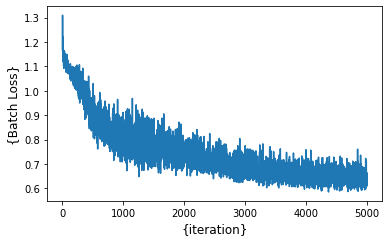

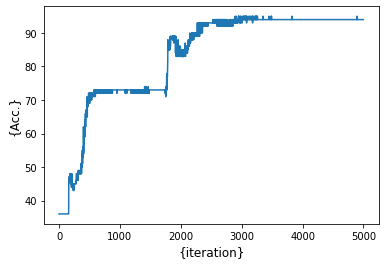

In [5]:
# evaluate on the test set
model.eval()
correct = 0
total = 0
for (xx, yy) in test_loader:
    X = Variable(xx.float()).to(device=device)
    labels = Variable(yy.flatten()-1).to(device=device)
    outputs = model(X)
    predicted = torch.argmax(outputs.data, dim=1)
    print("===")
    print(predicted)
    print(labels)
    loss = criterion(outputs, labels)
    print(loss)    
    total += labels.size(0)
    correct += (predicted.cpu() == labels).sum()

print(total)
print(correct)

print("Test Accuracy of the model on the ", num_epochs, " training test samples: ", (100 * correct.item() / total),"%")

print(losses)      
plt.plot(losses)
plt.xlabel(r'{iteration}',fontsize=12)
plt.ylabel(r'{Batch Loss}',fontsize=12)
plt.subplots_adjust(top=0.8)
plt.show()

plt.plot(acc)
plt.xlabel(r'{iteration}',fontsize=12)
plt.ylabel(r'{Acc.}',fontsize=12)
#plt.subplots_adjust(top=0.8)
plt.show()